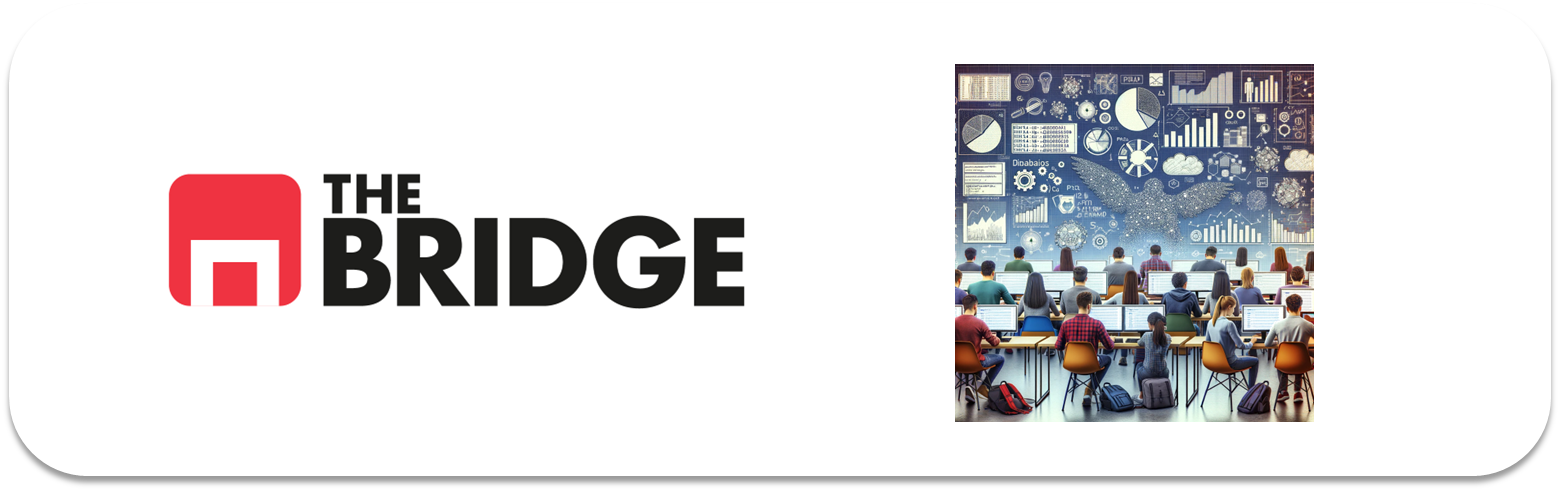

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import *
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, viajaba solo y no pagó el billete. Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado (PISTA: Aplicalo a la edad)
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.

In [2]:
df_titanic=pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SRPING_12\UNIT 2\TRABAJAO OBLIGATORIO\data\titanic.csv")

In [3]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df_titanic.drop(columns={"alive","adult_male","class","embarked"}, inplace= True)

In [5]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,who,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,C,Cherbourg,True


In [6]:
df_titanic.deck.mode()

0    C
Name: deck, dtype: object

In [7]:
20300/891

22.783389450056116

In [8]:
68800/891

77.21661054994388

In [9]:
df_titanic.age.mode()

0    24.0
Name: age, dtype: float64

In [10]:
71400/891

80.13468013468014

Además de las columnas repetidas, he decidido eliminar deck, que aunque seria un factor importante solo tenemos un 22,78% de los datos totales, por lo que las prediciones no seran muy acertadas y tampoco las puedo sustiuir por su moda ya que no daria datos reales. Sin embargo nos queDamos con age, ya que tenemos un 80.13 de los datos de la muestra

In [11]:
df_titanic.drop(columns={"deck"}, inplace= True)

In [12]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,Southampton,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,Cherbourg,True


In [13]:
# convertimos alone en numerica y la eliminamos:
df_titanic["alone_num"] = df_titanic["alone"].astype(int)
df_titanic.drop(columns={"alone"}, inplace= True)

In [14]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   who          891 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone_num    891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 66.3+ KB


In [15]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone_num
0,0,3,male,22.0,1,0,7.2500,man,Southampton,0
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,woman,Southampton,1
3,1,1,female,35.0,1,0,53.1000,woman,Southampton,0
4,0,3,male,35.0,0,0,8.0500,man,Southampton,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,Southampton,1
887,1,1,female,19.0,0,0,30.0000,woman,Southampton,1
888,0,3,female,NaN,1,2,23.4500,woman,Southampton,0
889,1,1,male,26.0,0,0,30.0000,man,Cherbourg,1


### Codifico las variables tipo objett, que son sex(2 opciones), who(3 opciones) y embark_town(3 opciones), mediante el sistema "one hot encoding"

In [16]:
df_titanic_encoder= pd.get_dummies(df_titanic, columns=["sex", "who", "embark_town"])

In [17]:
df_titanic_encoder

,survived,pclass,age,sibsp,parch,fare,alone_num,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,False,True,False,True,False,False,False,True
1,1,1,38.0,1,0,71.2833,0,True,False,False,False,True,True,False,False
2,1,3,26.0,0,0,7.9250,1,True,False,False,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,0,True,False,False,False,True,False,False,True
4,0,3,35.0,0,0,8.0500,1,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,False,True,False,True,False,False,False,True
887,1,1,19.0,0,0,30.0000,1,True,False,False,False,True,False,False,True
888,0,3,NaN,1,2,23.4500,0,True,False,False,False,True,False,False,True
889,1,1,26.0,0,0,30.0000,1,False,True,False,True,False,True,False,False


In [18]:
df_titanic_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone_num                891 non-null    int32  
 7   sex_female               891 non-null    bool   
 8   sex_male                 891 non-null    bool   
 9   who_child                891 non-null    bool   
 10  who_man                  891 non-null    bool   
 11  who_woman                891 non-null    bool   
 12  embark_town_Cherbourg    891 non-null    bool   
 13  embark_town_Queenstown   891 non-null    bool   
 14  embark_town_Southampton  8

In [19]:
# convertimos las columnas nuevas (sex_female sex_male who_child who_man	who_woman embark_town_Cherbourg	embark_town_Queenstown embark_town_Southampton) en numericas:
columnas_drop= ["sex_female", "sex_male", "who_child", "who_man", "who_woman", "embark_town_Cherbourg", "embark_town_Queenstown", "embark_town_Southampton"]
for col in columnas_drop:
    df_titanic_encoder[col] = df_titanic_encoder[col].astype(bool)
    df_titanic_encoder[col] = df_titanic_encoder[col].replace(False, 0)
    df_titanic_encoder[col] = df_titanic_encoder[col].replace(True, 1)

In [20]:
df_titanic_encoder

,survived,pclass,age,sibsp,parch,fare,alone_num,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,0,1,0,0,0,1
887,1,1,19.0,0,0,30.0000,1,1,0,0,0,1,0,0,1
888,0,3,NaN,1,2,23.4500,0,1,0,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,1,0,1,0,1,0,0


In [21]:
df_titanic_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone_num                891 non-null    int32  
 7   sex_female               891 non-null    int64  
 8   sex_male                 891 non-null    int64  
 9   who_child                891 non-null    int64  
 10  who_man                  891 non-null    int64  
 11  who_woman                891 non-null    int64  
 12  embark_town_Cherbourg    891 non-null    int64  
 13  embark_town_Queenstown   891 non-null    int64  
 14  embark_town_Southampton  8

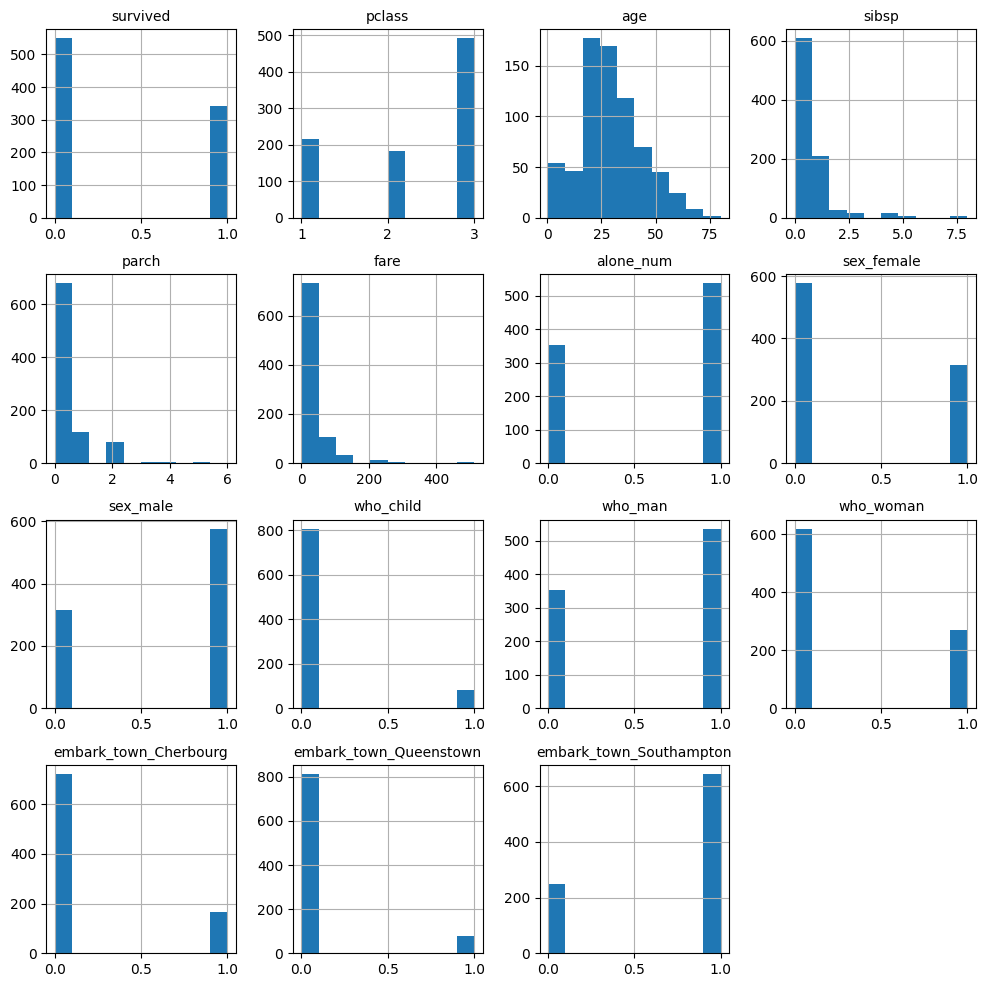

In [22]:

df_titanic_encoder.hist(figsize=(12,12));


In [42]:
#IMPUTAMOS LA MEDIA A AGE PARA ELIMINAR LOS NAN 
media= df_titanic_encoder.age.mean()

df_titanic_encoder.age.fillna(media, inplace = True)

### LOGARITMIZAMOS PARCH y SIBSP y FARE QUE SON HEAVY TAIL

In [24]:
print(df_titanic_encoder.sibsp.eq(0).sum())
print(df_titanic_encoder.parch.eq(0).sum())
print(df_titanic_encoder.fare.eq(0).sum())
print(df_titanic_encoder.age.eq(0).sum())

608
678
15
0


Como podemos observar el numero de ceros en la columna sibsp y parch es muy elevado, por lo que nos daria muchoas (- infinitos) al logaritmizar, por lo que rempplazaremos esos 0 por valores cercanos a ceros (1e-1000) 

In [50]:
df_titanic_encoder["sibsp_log"]= np.log(df_titanic_encoder.sibsp.replace(0, 0.000000000000000000000000000000000000000000001))
df_titanic_encoder["parch_log"]= np.log(df_titanic_encoder.parch.replace(0, 0.000000000000000000000000000000000000000000001))
df_titanic_encoder["fare_log"]= np.log(df_titanic_encoder.fare.replace(0, 0.000000000000000000000000000000000000000000001))
df_titanic_encoder["age_log"]= np.log(df_titanic_encoder.age)

In [26]:
df_titanic_encoder.drop(columns={"sibsp"}, inplace= True)
df_titanic_encoder.drop(columns={"parch"}, inplace= True)
df_titanic_encoder.drop(columns={"fare"}, inplace= True)


In [59]:
df_titanic_encoder.drop(columns={"age"}, inplace= True)

In [60]:
df_titanic_encoder

,survived,pclass,alone_num,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,sibsp_log,parch_log,fare_log,age_log
0,0,3,0,0,1,0,1,0,0,0,1,1.459541,-0.560493,0.060517,-0.203288
1,1,1,0,1,0,0,0,1,1,0,0,1.459541,-0.560493,0.226860,0.570624
2,1,3,1,1,0,0,0,1,0,0,1,-0.682233,-0.560493,0.066995,0.033263
3,1,1,0,1,0,0,0,1,0,0,1,1.459541,-0.560493,0.205429,0.454174
4,0,3,1,0,1,0,1,0,0,0,1,-0.682233,-0.560493,0.068134,0.454174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,1,0,0,0,1,-0.682233,-0.560493,0.103015,0.086704
887,1,1,1,1,0,0,0,1,0,0,1,-0.682233,-0.560493,0.163874,-0.410880
888,0,3,0,1,0,0,0,1,0,0,1,1.459541,1.791653,0.145947,0.221622
889,1,1,1,0,1,0,1,0,1,0,0,-0.682233,-0.560493,0.163874,0.033263


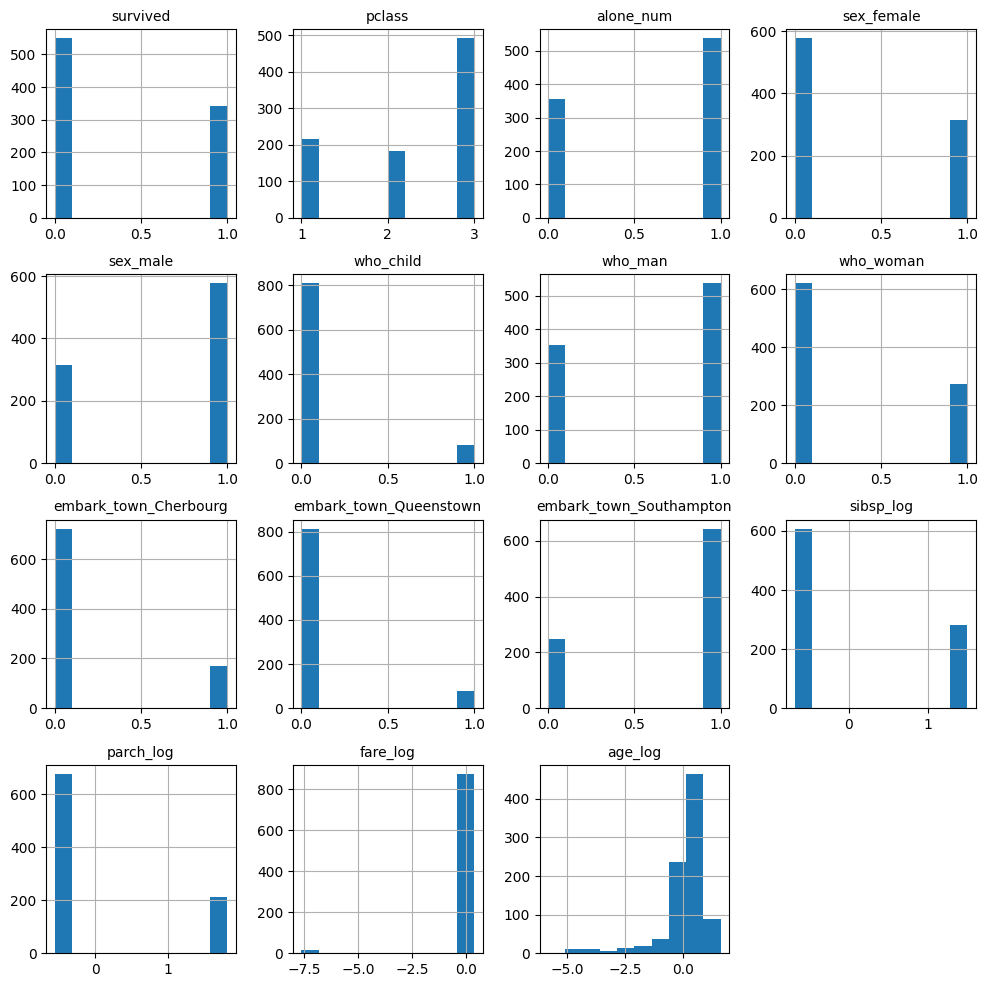

In [61]:
df_titanic_encoder.hist(figsize=(12,12));

### ESCALAMOS LAS VARIABLES LOGARITMIZADAS, PARA CENTRAR LOS VALORES ENTRE 0 Y 1

In [62]:
#vamos a intenatar escalar las columnas lotgarimizadas
scaler = StandardScaler()
df_titanic_encoder[["sibsp_log","parch_log","fare_log", "age_log"]] = scaler.fit_transform(df_titanic_encoder[["sibsp_log","parch_log","fare_log", "age_log"]])

In [63]:
df_titanic_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   alone_num                891 non-null    int32  
 3   sex_female               891 non-null    int64  
 4   sex_male                 891 non-null    int64  
 5   who_child                891 non-null    int64  
 6   who_man                  891 non-null    int64  
 7   who_woman                891 non-null    int64  
 8   embark_town_Cherbourg    891 non-null    int64  
 9   embark_town_Queenstown   891 non-null    int64  
 10  embark_town_Southampton  891 non-null    int64  
 11  sibsp_log                891 non-null    float64
 12  parch_log                891 non-null    float64
 13  fare_log                 891 non-null    float64
 14  age_log                  8

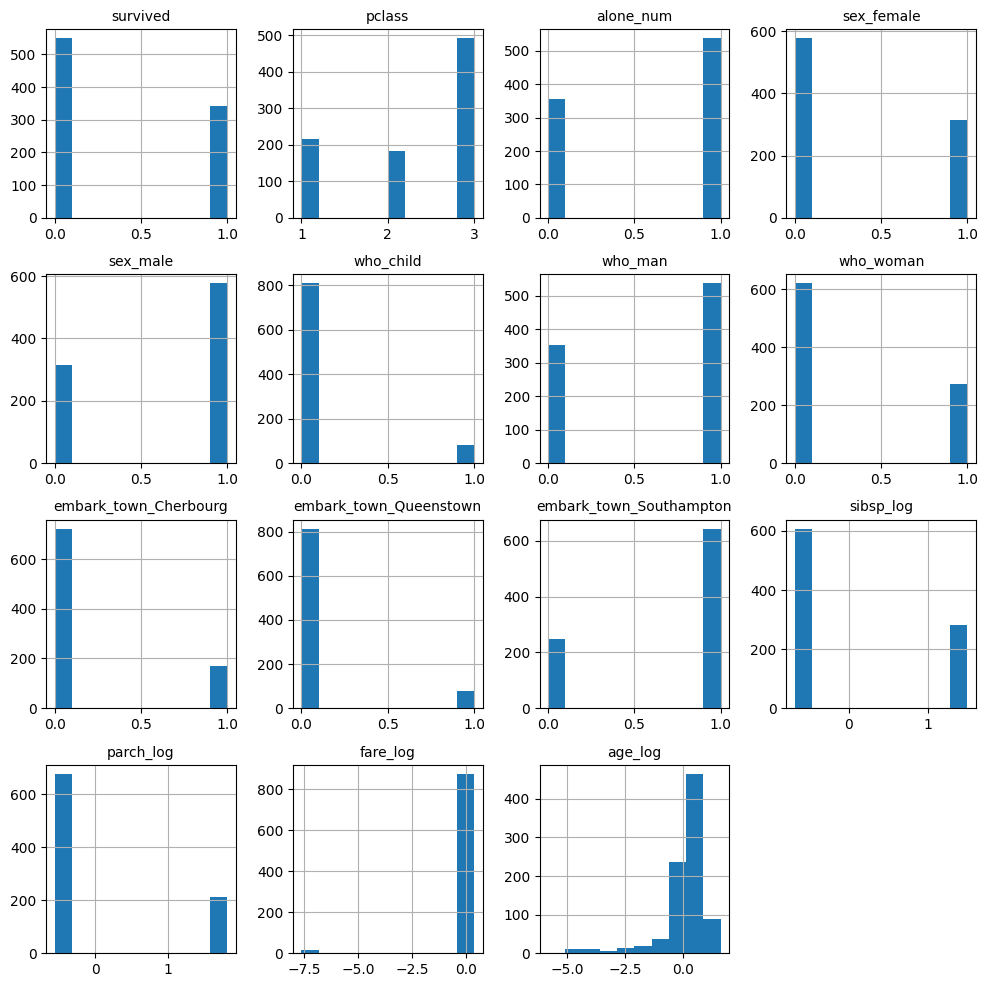

In [64]:
df_titanic_encoder.hist(figsize=(12,12));

## 3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

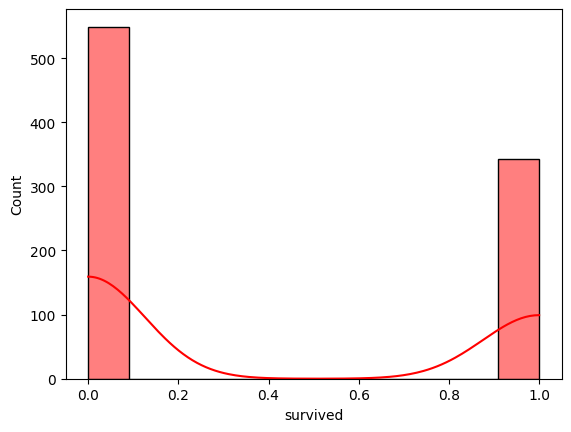

In [65]:
sns.histplot(df_titanic['survived'], color='red', kde = True)
plt.show()

La target es una variable binaria, al igual que las demas variables, excepto las 3 logaritmizadas, con valores centrados entre 0 y -7.5, como puede verse en la grafica, por lo que vamos a utilizar el modelo multi-clase

4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.

In [66]:
df_titanic_encoder

,survived,pclass,alone_num,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,sibsp_log,parch_log,fare_log,age_log
0,0,3,0,0,1,0,1,0,0,0,1,1.459541,-0.560493,0.060517,-0.203288
1,1,1,0,1,0,0,0,1,1,0,0,1.459541,-0.560493,0.226860,0.570624
2,1,3,1,1,0,0,0,1,0,0,1,-0.682233,-0.560493,0.066995,0.033263
3,1,1,0,1,0,0,0,1,0,0,1,1.459541,-0.560493,0.205429,0.454174
4,0,3,1,0,1,0,1,0,0,0,1,-0.682233,-0.560493,0.068134,0.454174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,1,0,0,0,1,-0.682233,-0.560493,0.103015,0.086704
887,1,1,1,1,0,0,0,1,0,0,1,-0.682233,-0.560493,0.163874,-0.410880
888,0,3,0,1,0,0,0,1,0,0,1,1.459541,1.791653,0.145947,0.221622
889,1,1,1,0,1,0,1,0,1,0,0,-0.682233,-0.560493,0.163874,0.033263


ESTUDIO DE CORRELACIONES

In [67]:
correla=df_titanic_encoder.corr(numeric_only=True)["survived"].sort_values(ascending = False)
correla_abs= np.abs(df_titanic_encoder.corr(numeric_only=True)["survived"].sort_values(ascending = False))

In [68]:
correla_abs

survived                   1.000000
sex_female                 0.543351
who_woman                  0.506562
embark_town_Cherbourg      0.168240
parch_log                  0.147071
who_child                  0.136107
sibsp_log                  0.114822
fare_log                   0.107000
embark_town_Queenstown     0.003650
age_log                    0.125056
embark_town_Southampton    0.155660
alone_num                  0.203367
pclass                     0.338481
sex_male                   0.543351
who_man                    0.557080
Name: survived, dtype: float64

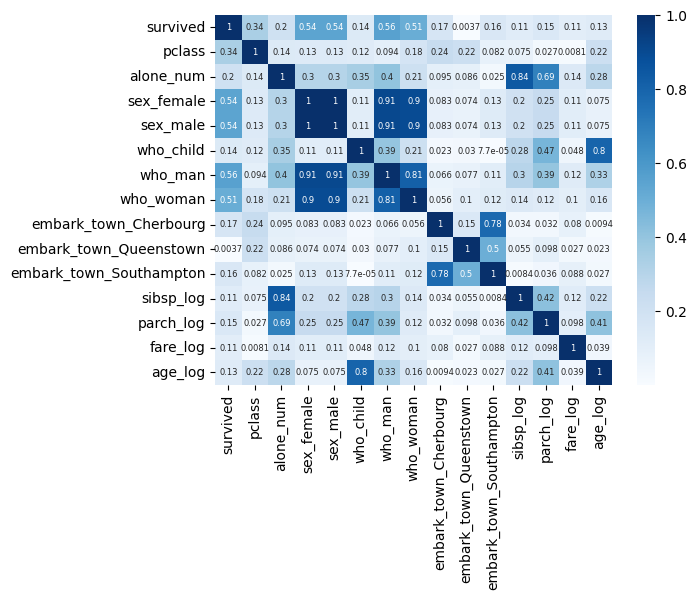

In [69]:
sns.heatmap(np.abs(df_titanic_encoder.corr(numeric_only=True)), cmap="Blues", annot=True)
plt.show();

sex_female , sex_male y who man y who woman aportan los mismos datos, asi que elimino de features sex_female y sex_male

In [108]:
# HAGO LOS GRUPOS DE ENTRENAMIENTO Y TEST

# Features
X = df_titanic_encoder[["pclass","alone_num","who_child","who_man","who_woman","embark_town_Cherbourg","embark_town_Queenstown",
                        "embark_town_Southampton","sibsp_log","parch_log","fare_log","age_log"]]
y = df_titanic_encoder["survived"]  # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape

(712, 12)

In [72]:
X_test.shape

(179, 12)

In [103]:
#CREO EL MODELO DE REGRESION LOGISTICA

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [104]:
# Predicciones en el conjunto de entrenamiento
y_pred = lr.predict(X_test)

In [105]:
lr.intercept_

array([2.75295833])

In [123]:
lr.coef_[0]

array([-1.04785114, -0.45224412,  0.3023138 , -1.65675649,  1.35432328,
        0.25433486, -0.0868214 , -0.29366566, -0.32735847, -0.28543439,
        0.16060248, -0.34779067])

EVALUAMOS EL MODELO

In [110]:
# Evaluación del modelo
resumen_evaluacion = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Mostrar métricas
print("Classification Report:\n", resumen_evaluacion)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)



Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]


In [91]:
7400/179

41.340782122905026

In [92]:
10500/179

58.659217877094974

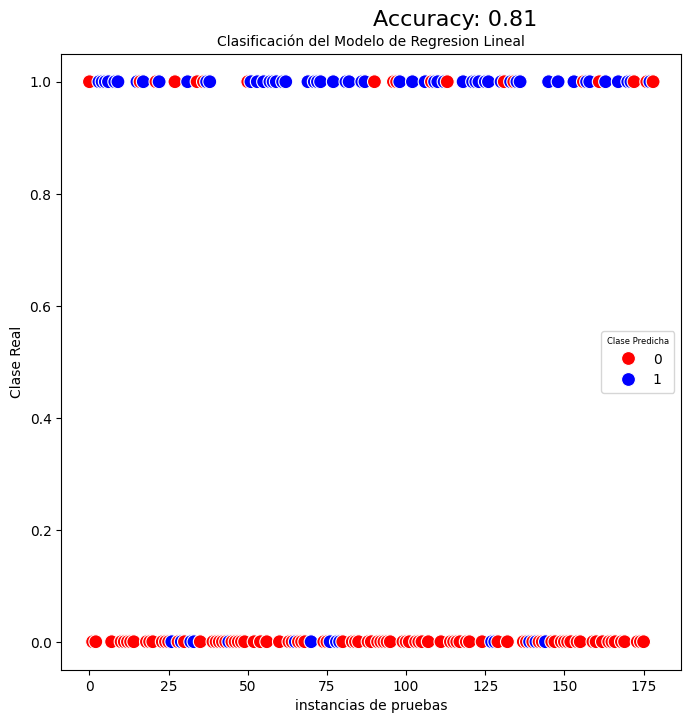

In [76]:
# gráfico de dispersión
plt.figure(figsize=(8, 8))
sns.scatterplot(x=range(len(y_test)), y=y_test, hue=y_pred, palette={0: 'red', 1: 'blue'}, marker='o', s=100)
plt.title("Clasificación del Modelo de Regresion Logistica")
plt.xlabel("instancias de pruebas")
plt.ylabel("Clase Real")
plt.legend(title="Clase Predicha", loc="center right")
plt.text(len(y_test) * 0.5, 1.1, f'Accuracy: {accuracy:.2f}',fontsize=16)
plt.show()


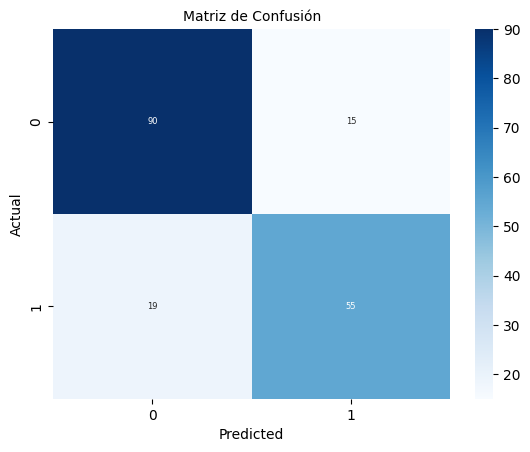

In [81]:
# grafica de la matriz de confusión 
sns.heatmap(confusion_mat, annot=True,  cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

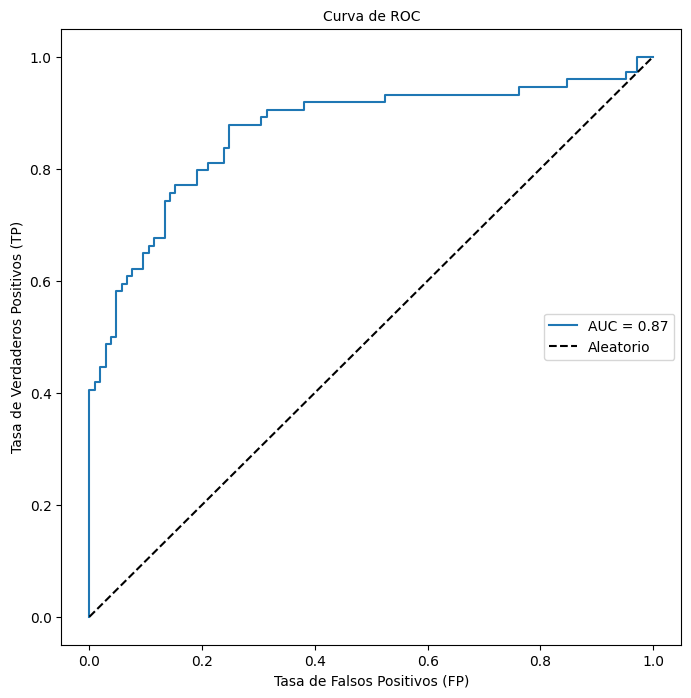

In [99]:
# etiquetas reales
y_test
# Obtener las puntuaciones de probabilidad para la clase positiva (1)
y_scores = rl.predict_proba(X_test)[:, 1]

# Calcular la tasa de falsos positivos (FPR) y la tasa de verdaderos positivos (TPR)
fp, tp, thresholds = roc_curve(y_test, y_scores)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_scores)

# Crear el gráfico de la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fp, tp, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FP)')
plt.ylabel('Tasa de Verdaderos Positivos (TP)')
plt.title('Curva de ROC')
plt.legend(loc='center right')
plt.show()


- El resultado del modelo de Regresion logistica ha dado que el 81% de las predicciones realizadas fueron correctas en el conjunto de la prueba. <br>
Segun la matriz de confusión,  el 90 casos fueron TN mas 15 de FP, haciendo un total 105 instancias negativas(58,65%), frente a 55 TP mas 19 FN, siendo un total 74 instancias positivas(41,34%). <br>
El F1-score es una medida que tiene en cuenta la sensibilidad y la presision del modelo, estando entre el valor 0 y 1, siendo el 1 el 100% den rendimiento del modelo.
En el caso que nos ocupa, tenemos un 0.84 en valores 0 y 0.76 en valores 1, por lo que el rendimniento en ambos es bastante efectivo.<br>
La curva de ROC, arroja una cruva bastante cercana al valor 1, teniendo un AUC( area bajo la curva) de un 0.87, teniendo un gran rendimiento para discriminar entre las instancias postivas y negativas, ya que el valor 1 seria la perfeccion en esta tarea.<br>
- CONCLUSIÓN: Por todo lo anteriormnente analizado, el rendimiento de este modelo clasificatorio en relacion a la suvervivencia del titanic es muy optimo, con cerca del 90 % de rendimiento en las prediciones realziadas con los datos del conjunto analizados.



# EXTRA

10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, viajaba solo y no pagó el billete. Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado (PISTA: Aplicalo a la edad)
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  

In [133]:
# dataframe
df_coef= pd.DataFrame(lr.coef_.T, index=X.columns, columns=['Coeficientes'])

df_coef

,Coeficientes
pclass,-1.047851
alone_num,-0.452244
who_child,0.302314
who_man,-1.656756
who_woman,1.354323
embark_town_Cherbourg,0.254335
embark_town_Queenstown,-0.086821
embark_town_Southampton,-0.293666
sibsp_log,-0.327358
parch_log,-0.285434


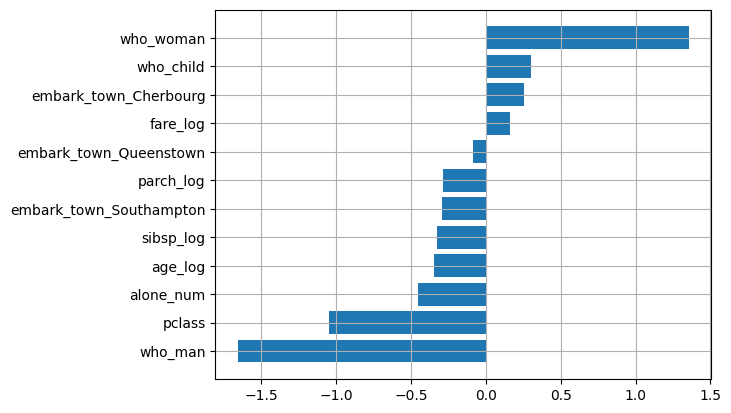

In [136]:
df_coef = pd.DataFrame(lr.coef_.T, index=X.columns, columns=['coeficientes']).sort_values('coeficientes',ascending=True)
plt.barh(df_coef.index, df_coef.coeficientes)
plt.grid()

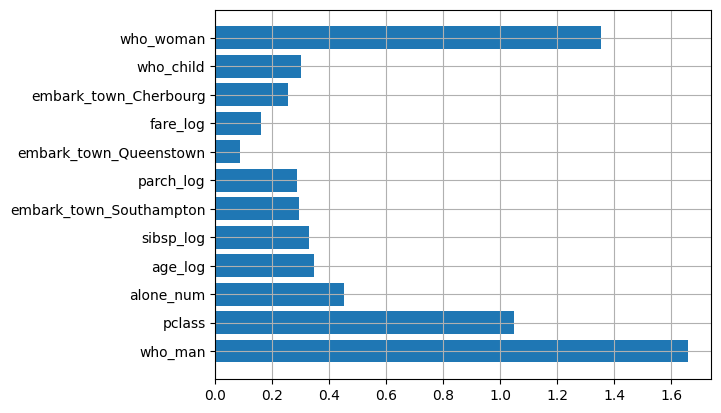

In [139]:
df_coef = pd.DataFrame(lr.coef_.T, index=X.columns, columns=['coeficientes']).sort_values('coeficientes',ascending=True)
plt.barh(df_coef.index, np.abs(df_coef.coeficientes))
plt.grid()

Las mas influyentes son who_man, who_woman,pcclass

11. Procesa el dataset de Test para que puedas usarlo en la evaluación 

In [155]:
lrt = LogisticRegression()
lrt.fit(X_test, y_test)



LogisticRegression()

In [166]:
y_pred_test = lrt.predict(X)

In [167]:
lrt.intercept_

array([3.37698375])

In [158]:
lrt.coef_

array([[-1.36835718, -0.27759405,  0.15858537, -1.29414982,  1.13565437,
         0.01841199,  0.41202181, -0.43034388,  0.0325116 , -0.2477607 ,
         0.37846853, -0.94552029]])

In [159]:
# dataframe
df_coef_test= pd.DataFrame(lrt.coef_.T, index=X.columns, columns=['Coeficientes'])

df_coef_test

,Coeficientes
pclass,-1.368357
alone_num,-0.277594
who_child,0.158585
who_man,-1.294150
who_woman,1.135654
embark_town_Cherbourg,0.018412
embark_town_Queenstown,0.412022
embark_town_Southampton,-0.430344
sibsp_log,0.032512
parch_log,-0.247761


In [168]:
X

,pclass,alone_num,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,sibsp_log,parch_log,fare_log,age_log
0,3,0,0,1,0,0,0,1,1.459541,-0.560493,0.060517,-0.203288
1,1,0,0,0,1,1,0,0,1.459541,-0.560493,0.226860,0.570624
2,3,1,0,0,1,0,0,1,-0.682233,-0.560493,0.066995,0.033263
3,1,0,0,0,1,0,0,1,1.459541,-0.560493,0.205429,0.454174
4,3,1,0,1,0,0,0,1,-0.682233,-0.560493,0.068134,0.454174
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,0,1,0,0,0,1,-0.682233,-0.560493,0.103015,0.086704
887,1,1,0,0,1,0,0,1,-0.682233,-0.560493,0.163874,-0.410880
888,3,0,0,0,1,0,0,1,1.459541,1.791653,0.145947,0.221622
889,1,1,0,1,0,1,0,0,-0.682233,-0.560493,0.163874,0.033263


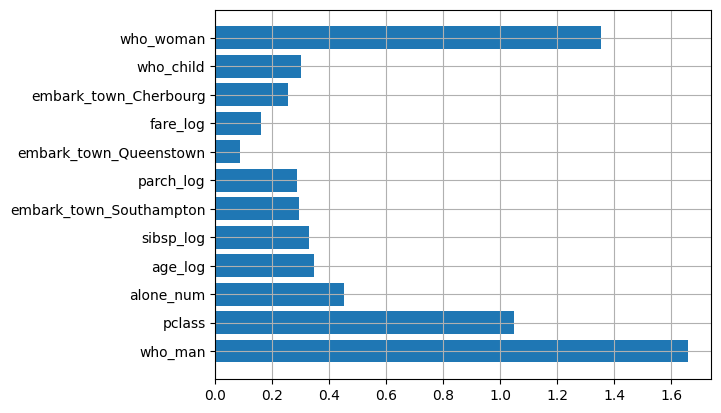

In [151]:
df_coef_test = pd.DataFrame(lrt.coef_.T, index=X.columns, columns=['coeficientes']).sort_values('coeficientes',ascending=True)
plt.barh(df_coef.index, np.abs(df_coef.coeficientes))
plt.grid()

13. Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, viajaba solo y no pagó el billete. Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado (PISTA: Aplicalo a la edad)

In [185]:
df_titanic2 = df_titanic=pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SRPING_12\UNIT 2\TRABAJAO OBLIGATORIO\data\titanic.csv")

In [187]:
df_titanic2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


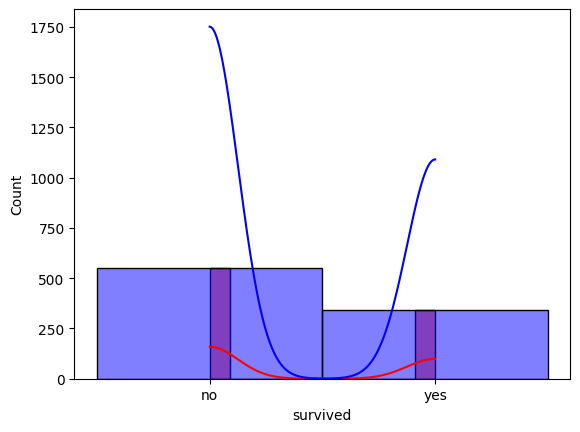

In [198]:
sns.histplot(df_titanic2['survived'], color='red', kde = True)
sns.histplot(df_titanic2['alive'], color='blue', kde = True)
plt.show()

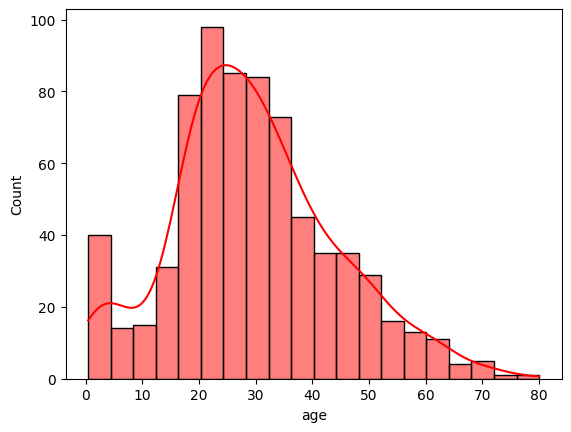

In [188]:
sns.histplot(df_titanic2['age'], color='red', kde = True)
plt.show()

    Debido a que sobrevivir despecto a las demas caracterisiticas no tienen relacion directa, no se divide los casos favorables entre los casos totales, sino que se unen todas las caracteristicas

In [192]:
características= (df_titanic2.who == "man") & (df_titanic2.age >= 30) & (df_titanic2['age'] <= 40) & (df_titanic2.embark_town == "Southampton") & (df_titanic2.fare == 0) & (df_titanic2.alone == True)
probabilidad = df_titanic2[características].survived.value_counts(1)


print(f"la supervivencia de un hombre entre 30-40 años que embarcó en el puerto de Southampton sin pagar billete, yendo solo: {probabilidad}")

la supervivencia de un hombre entre 30-40 años que embarcó en el puerto de Southampton sin pagar billete, yendo solo: survived
0    1.0
Name: proportion, dtype: float64


## 14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  

In [214]:
# HAGO LOS GRUPOS DE ENTRENAMIENTO Y TEST

# Features
Xe = df_titanic_encoder[["alone_num","who_child","who_man","who_woman","embark_town_Cherbourg","embark_town_Queenstown",
                        "embark_town_Southampton","sibsp_log","parch_log","fare_log","age_log","survived"]]
ye = df_titanic_encoder["pclass"]  # Variable dependiente

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
#CREO EL MODELO DE REGRESION LOGISTICA

lr_e = LogisticRegression()
lr_e.fit(X_train_e, y_train_e)

LogisticRegression()

In [216]:
# Predicciones en el conjunto de entrenamiento
y_pred_e = lr_e.predict(X_test_e)

In [229]:
# Evaluación del modelo
resumen_evaluacion = classification_report(y_test_e, y_pred_e)

# Mostrar métricas
print("Classification Report:\n", resumen_evaluacion)




Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.66      0.69        53
           2       0.33      0.09      0.14        33
           3       0.68      0.89      0.77        93

    accuracy                           0.68       179
   macro avg       0.58      0.55      0.54       179
weighted avg       0.63      0.68      0.63       179



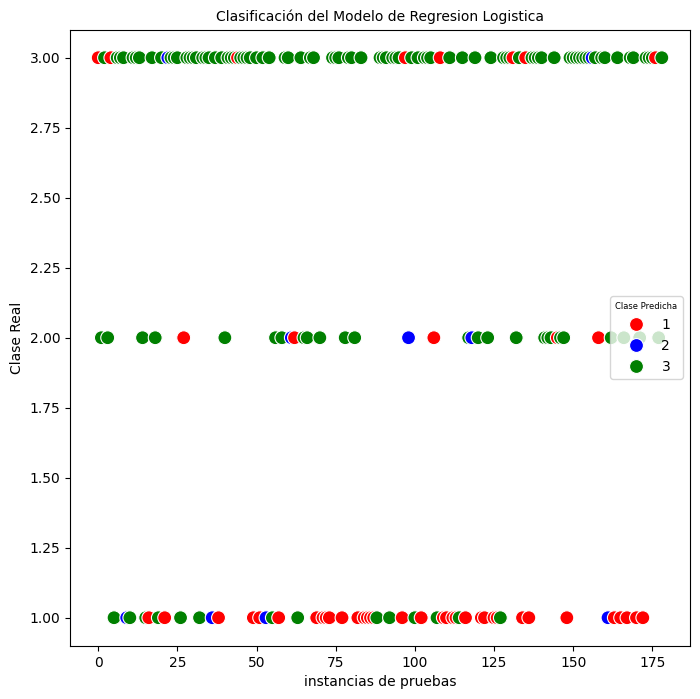

In [233]:
# gráfico de dispersión
plt.figure(figsize=(8, 8))
sns.scatterplot(x=range(len(y_test_e)), y=y_test_e, hue=y_pred_e, palette={1: 'red', 2: 'blue', 3:"green"}, marker='o', s=100)
plt.title("Clasificación del Modelo de Regresion Logistica")
plt.xlabel("instancias de pruebas")
plt.ylabel("Clase Real")
plt.legend(title="Clase Predicha", loc="center right")
plt.show()

Con la variable pclass de target, el f1-score ha dado un resultado 0.69, siendo una medida que combina la precision y la sensibilidad , siendo un valor bastante positivo ya que siendo mayor a 0,5 tiene bastante poder de discriminacion en la clasificación realizada por el modelo analizado